# CS405 Machine Learning
## Lab #2 Preliminary

Objectives: This lab will introduce how to pre-process and transform data to make machine-learning algorithm work. In this lab, you will employ several supervised algorithms of your choice to accurately model individuals’ income using data collected from the 1994 U.S census. Your goal with this lab is to construct a model that accurately predicts whether an individual makes more than $50000.

### Exploring the Data
Run the code cell below to load necessary Python l ibraries and load the census data. Note that the last column from this dataset “income”, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv('census.csv')

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Exercise 0
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000 annually. In the code cell below, you will need to compute the following:

- The total number of records, `n_records`;
- The number of individuals making more than \$50000 annually, `n_greater_50k`.
- The number of individuals making at most \$50000 annually, `n_at_most_50K`.
- The percentage of individuals making at more than $50000 annually, `greater_percent`
- Feature values for each column

Tips :As the data is stored as pandas, [this tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) will help you finish.

In [2]:
########### Write Your Code Here ###########

n_records = len(data)
print('n_records:',n_records)

n_greater_50k = len(data[data['income']!='<=50K'])
print('n_greater_50k:',n_greater_50k)

n_at_most_50K = len(data[data['income']=='<=50K'])
print('n_at_most_50K:',n_at_most_50K)

greater_percent = 100.0*len(data[data['income']!='<=50K'])/len(data)
print(f'greater_percent: {greater_percent}%')

print('\n','*'*10,'Features of Columns','*'*10)
data.info(verbose=True)
############################################

n_records: 45222
n_greater_50k: 11208
n_at_most_50K: 34014
greater_percent: 24.78439697492371%

 ********** Features of Columns **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(

### Preparing the Data
Before the data can be used as the input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as preprocessing. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: `capital-gain` and `capital-loss`. The code cell below will plot a histogram of these two features. Note the range of the values present and how they are distributed.


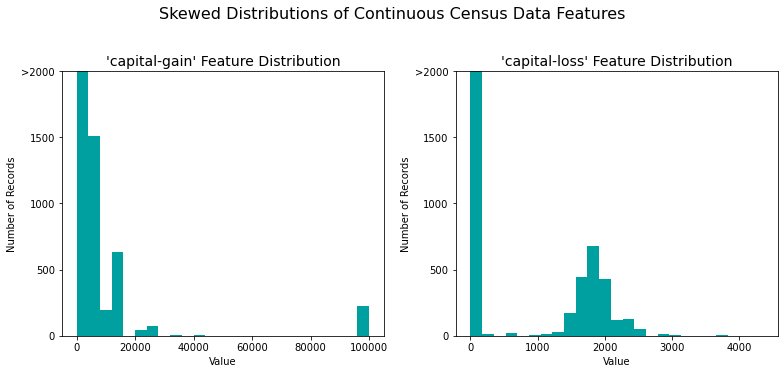

In [3]:
# Split the data into features and target label

income_raw = data['income']
features_raw = data.drop('income', axis=1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `capital-gain` and `apital-loss`, it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully. Below code cell will perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed.

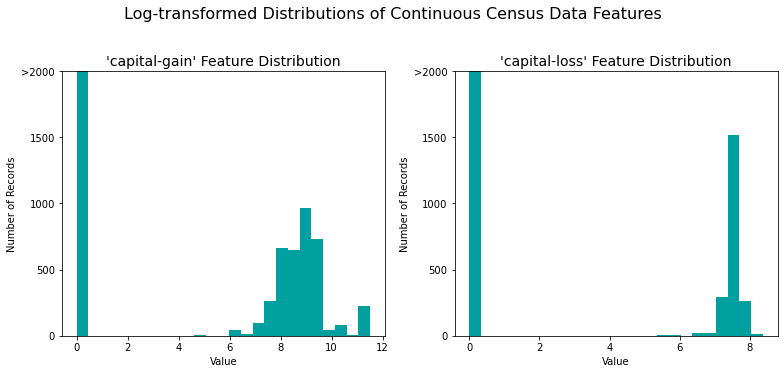

In [4]:
# Log-transform the skewrd features
skewed = ['capital-gain','capital-loss']
features_log_transformed = pd.DataFrame(data=features_raw)
features_log_transformed[skewed]=features_raw[skewed].apply(lambda x:np.log(x+1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed=True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `capital-gain` or `capital-loss` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()  # default=(0,1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))
#features_log_minmax_transform.head(n = 5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Data Preprocessing
From the table in above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called 'categorical variables') be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a ‘dummy’ variable for each possible category of each non-numeric feature. For example, assume some features has three possible entries: A, B and C. We then encode this feature into someFeature_A, someFeature_B and someFeature_C.
<img src="pictures/onehot.png">
Additionally, as with the non-numeric features, we need to convert the non-numeric target label, ’income’ to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as 0 and 1, respectively.
<img src="pictures/onehot1.png">

### Exercise 1:
- Perform one-hot encoding on the data
- Convert the target label ‘income_raw’ to numerical entries (set records with “<=50k” to 0 and records with “>50k” to 1).

In [6]:
########### Write Your Code Here ###########

# Perform one-hot encoding on the data
one_hot = pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

# Convert the target label ‘income_raw’ to numerical entries (set records with “<=50k” to 0 and records with “>50k” to 1)
data['income'] = data['income'].apply(lambda x:0 if x=='<=50K' or x=='0' or x==0 else 1)

# deal with features_final and income
features_final = pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
income = data['income']

# Generate final feature
scalar = MinMaxScaler()
numeral = ['age','education-num','capital-gain','capital-loss','hours-per-week']
features_final[numeral] = scalar.fit_transform(features_final[numeral])
features_final = features_final.drop(labels = ['income'],axis = 1)

############################################

### Shuffle and Split Data
*Tips: pandas.get_dummies() can perform one-hot encoding.*
When all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.


In [7]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'feature' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


### Evaluating Model Preference
<img src='pictures/confusion.png' style="zoom:50%;"/>
Accuracy measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions.
$$ACC = \frac{TP+TN}{TP+FP+TN+FN}$$

<br/>
In Python you can calculate it in the following way:

```python
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_class = y_pred_pos > threshold
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_class).ravel()
accuracy = (tp+ tn) / (tp + fp + fn + tn)

# Or simply
accuracy_score(y_true, y_pred class)
```

- Precision: <br/>**Precision** tells us what proportion of messages we classified as positive. It is a ratio of true positives to all positive predictions. In other words, 
$$ Precision = TP/(TP + FP) $$

- Recall: <br/>**Recall(sensitivity)** tells us what proportion of messages that actually were positive were classified by us as positive.
$$Recall = TP/(TP + FN)$$

- F1 score: <br/>
We can use **F-beta** score as a metric that considers both precision and  recall:
$$F_\beta=(1+\beta^2)\bullet\frac{precision\bullet recall}{(\beta^2 \bullet precision)+recall}$$
When choosing beta in your F-beta score **the more you care about recall** over precision **the higher beta** you should choose. For example, with **[F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) we care equally about recall and precision** with F2 score, recall is twice as important to us.

- TPR & FPR & ROC & AUC: 
$$TPR(true\ positive\ rate) = \frac{positives\_correctly\_classified}{total\_positives}=\frac{TP}{TP+FN}=\frac{TP}{P}$$ $$FPR(false\ positive\ rate) = \frac{negatives\_incorrectly\_classified}{total\_negatives}=\frac{FP}{TN+FP}=\frac{FP}{N}$$ ROC（Receiver Operating Characteristic is used to measure the output quality of the evaluation classifier. ROC curves are two-dimensional graphs in which true positive rate (TPR) is ploted on the Y axis and false positive rate (FPR) is plotted on the X axis. An ROC graph depicts relative tradeoffs between true positive rate (TPR) and false positive rate (FPR). Basically, for every threshold, we calculate TPR and FPR and plot it on one chart. <br/> *Example data and curve for ROC:* <img src='pictures/roc_data.png'> <br/> <img src='pictures/roc_curve.png' style='zoom: 50%;'> <br/> The higher TPR and the lower FPR is for each threshold the better and so classifiers that have curves that are more top-left-side are better. <br/> <img src='pictures/roc_curve1.png' style='zoom: 50%;'> <br/> AUC (Area Under Curve) means area under the curve, it is a performance metric that you can use to evaluate classification models. There are functions for calculating AUC available in many programming languages. In python, you can refer to [document from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score).




### Exercise 2
Now if we assume a model that predicts any individual's income more than \$50,000, then what would be that model's accuracy and F-score on this dataset? You can use the code provided in the previous section.

In [8]:
########### Write Your Code Here ###########
from sklearn.metrics import accuracy_score, confusion_matrix
def benchmark(test,pred):
    accuracy = accuracy_score(test,pred)
    print('accuracy is: {}'.format(accuracy))
    tn, fp, fn, tp =confusion_matrix(test,pred).ravel()
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    F=2*precision*recall/(precision+recall)
    print('F-score  is: {}'.format(F))
    return accuracy,F
accuracy,F = benchmark(income,np.ones(len(income)))
############################################

accuracy is: 0.2478439697492371
F-score  is: 0.39723551302498666


### Exercise 3
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

----------Decision Tree----------


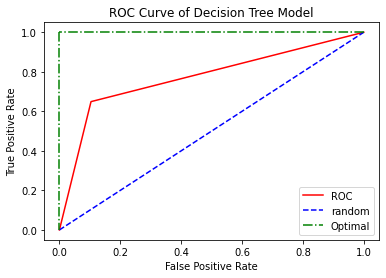

accuracy is: 0.8359314538419016
F-score  is: 0.6585365853658537
----------KNN----------


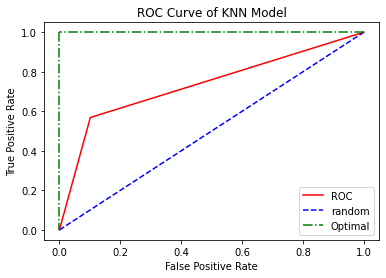

accuracy is: 0.8180210060807076
F-score  is: 0.6037554164660568
----------Naive Bayes----------


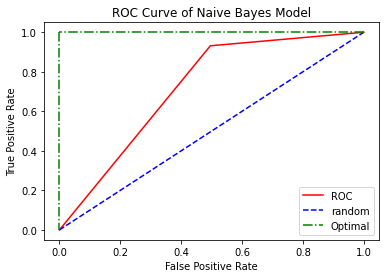

accuracy is: 0.6082918739635158
F-score  is: 0.5369232780028754


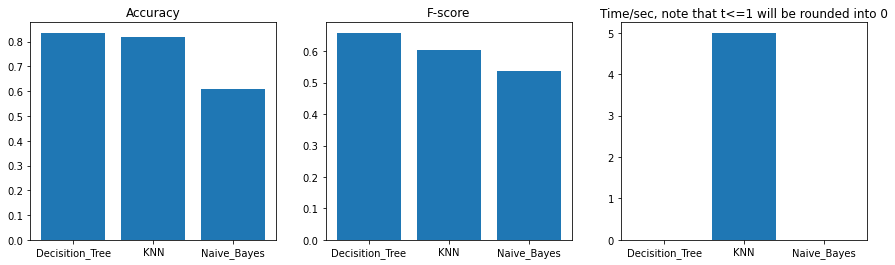

In [9]:
########### Write Your Code Here ###########
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB as GNB
import datetime
acc_list = []
f_list = []
time_list = []
def plot_roc(test,pred,model):  
    fpr, tpr, thersholds = roc_curve(test, pred)
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label = 'random')
    plt.plot([0,0], [1,0], color='green', linestyle='-.', label = 'Optimal')
    plt.plot([1,0], [1,1], color='green', linestyle='-.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of {} Model'.format(model))
    plt.legend()
    plt.show()
    
'''
Decision Tree
'''
print('----------Decision Tree----------')
START = datetime.datetime.now()
dt = DTR(max_depth=20)
dt.fit(X_train,y_train)
y_pred = [1 if i>=0.50 else 0 for i in dt.predict(X_test)]
plot_roc(y_test,y_pred,'Decision Tree')
acc,f = benchmark(y_test,y_pred)
acc_list.append(acc)
f_list.append(f)
END = datetime.datetime.now()
dtime = END-START
time_list.append(dtime.seconds)

'''
KNN
'''
print('----------KNN----------')
START = datetime.datetime.now()
knn = KNN()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
plot_roc(y_test,y_pred,'KNN')
acc,f = benchmark(y_test,y_pred)
acc_list.append(acc)
f_list.append(f)
END = datetime.datetime.now()
dtime = END-START
time_list.append(dtime.seconds)


'''
Naive Bayes
'''
print('----------Naive Bayes----------')
START = datetime.datetime.now()
gnb = GNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
plot_roc(y_test,y_pred,'Naive Bayes')
acc,f = benchmark(y_test,y_pred)
acc_list.append(acc)
f_list.append(f)
END = datetime.datetime.now()
dtime = END-START
time_list.append(dtime.seconds)

'''
Analysis
'''

result = pd.DataFrame({'model':[
    'Decisition_Tree','KNN','Naive_Bayes'
],'accuracy':acc_list,'F-score':f_list,'time':time_list})#.set_index(['model'])
result
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.bar(result.model,result.accuracy)
plt.title('Accuracy')
plt.subplot(132)
plt.bar(result.model,result['F-score'])
plt.title('F-score')
plt.subplot(133)
plt.bar(result.model,result['time'])
plt.title('Time/sec, note that t<=1 will be rounded into 0')
plt.show()


############################################

***Answer:*** According to the bars, we can find that Decision Tree is the most accurate model, Naive Bayes is the most efficient model, and KNN performs a disasterous running time!

### Questions

#### (1) An important task when performing supervised learning on a dataset like the census data we study here is determining which features provides the most predictive power. Choose a scikit-learn classifier (e.g adaboost, random forests) that has a feature_importance_ attribute, which is a function that ranks the importance of features according to the chosen classifier. List three of the supervised learning models above that are appropriate for this problem that you will test on the census data.

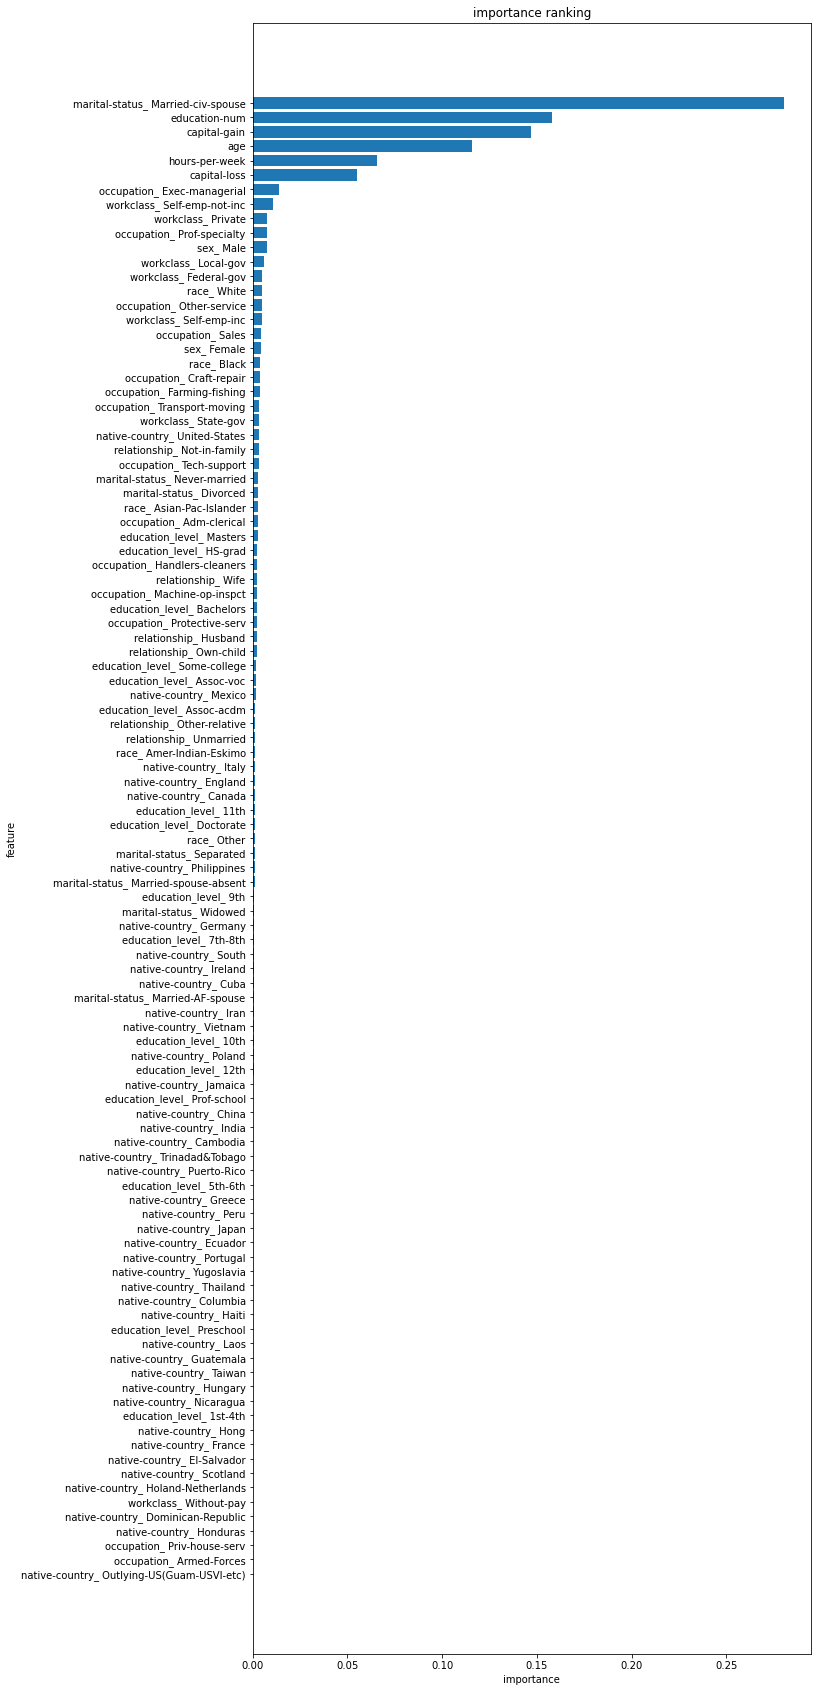

In [10]:
########### Write Your Code Here ###########

# Analysis with Decision Tree
f_dict = {}
for feature, importance in zip(features_final.columns, dt.feature_importances_):
    f_dict[feature] = importance
feature_list = list(f_dict)
value_list = [f_dict[i] for i in f_dict]

d = pd.DataFrame({'feature':feature_list,'importance':value_list})
d = d.sort_values(['importance'],ascending=True)
plt.figure(figsize=(10,30))
plt.barh(d.feature,d.importance)
plt.title('importance ranking')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()

############################################

#### (2) Describe one real-world application in industry where a model can be applied

***Answer:***
Classify group of customers in insurance industry, to determine the specific insurance rate for each person

#### (3) What are the strengths of the model; when does it perform well?



***Answer:*** For the decision tree model, the stucture of the tree is visible; it takes less data to train the model; it takes logistic time to feed the data.

#### (4) What are the weaknesses of the model; when does it perform poorly?


***Answer:*** The model is neither general nor stable. When we add a new feature to the model, the whole tree has to be retrained. Besides, it is almost impossible to find the optimal decision tree.

#### (5) What makes this model a good candidate for the problem, given what you know about the data?

***Answer:*** Decition tree is specifically interpretative model, whose nodes can be visualized to explain the relationship of data.